# Adding plots

It is also possible to display `matplotlib` and `plotly` figures and plots in `streamlit`. Here we will explore displaying a histogram of replications for a chosen performance 
measure.

We will use `plotly` to create the chart.

We will also introduce a more advanced layout to our web app by introducing columns to the results page.

## 1. Imports

We use `plotly.express` simplify the creation of our charts.  This provides a high level wrapper around `plotly`

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
from model import Experiment, multiple_replications

## 2. Code for creating the `plotly` histogram

We will run 100 replications of the simulation model and then display the results in a histogram.

We can use the `px.histogram` method to quickly produce a histogram.

### 2.1 Get the replications

In [3]:
default_experiment = Experiment()
results = multiple_replications(default_experiment, n_reps=100)
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   01_mean_waiting_time        100 non-null    float64
 1   02_operator_util            100 non-null    float64
 2   03_mean_nurse_waiting_time  100 non-null    float64
 3   04_nurse_util               100 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


### 2.2. Histogram of mean waiting time

In addition to the box plot we will also add a boxplot to see the median and the lower and upper quartiles of the distribution.

> As an alternative you could try `marginal='violin'` or `marginal='rug'`

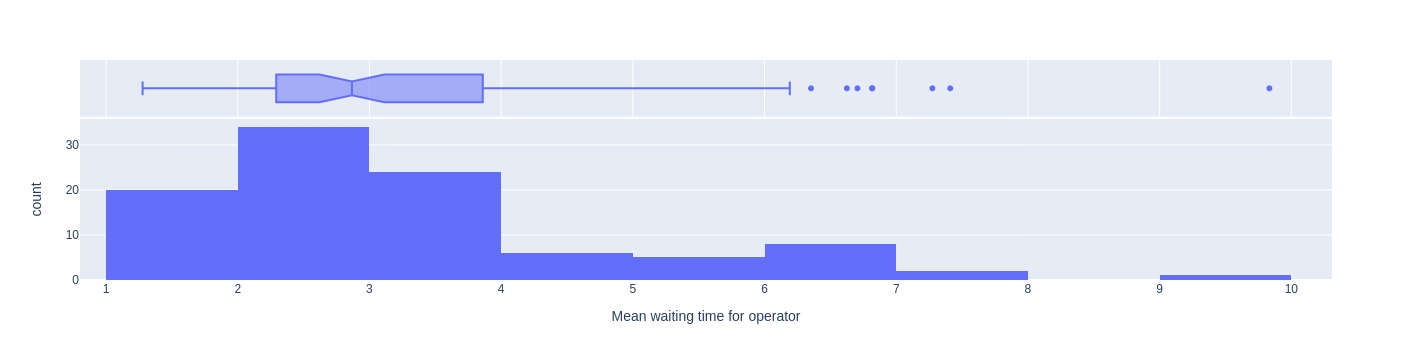

In [6]:

fig = px.histogram(results['01_mean_waiting_time'], 
                   labels={'value':'Mean waiting time for operator'}, 
                   marginal="box")

# hide legend
fig.update(layout_showlegend=False)
fig

## 3. Adding a chart to the web app

We will make the following changes to the web app script:

1. Add in a function called `create_hist`. This will implement the `plotly` histogram code we included above.
2. Alter the page width using `st.set_page_config()`. We are going to show the table of results and chart side by side so we need a slightly wider page layout
3. Create two columns for the results using `st.columns(2)`
3. Use `st.plotly_chart` function to display the histogram

The full script is below.  Copy and paste this into a file called `app_with_chart` and run.  The figure at the end of this page illustrates the result after running the simulation model.

```python
"""
The code in this streamlit script adds in a basic plotly 
chart to display a histogram of replications
"""
import streamlit as st
import plotly.express as px
from model import Experiment, multiple_replications

INTRO_FILE = './resources/model_info.md'

def read_file_contents(file_name):
    ''''
    Read the contents of a file.

    Params:
    ------
    file_name: str
        Path to file.

    Returns:
    -------
    str
    '''
    with open(file_name) as f:
        return f.read()
    

################################################################################
# MODIFICATION: code to create plotly histogram
def create_hist(results, column, value_label, marginal='box'):
    '''
    Create and return a plotly express histogram of
    the results column
    '''
    fig = px.histogram(results[column], labels={'value':value_label},
                       marginal=marginal)
    # hide legend
    fig.update(layout_showlegend=False)
    
    return fig
################################################################################


################################################################################
# MODIFICATION: update to wide page settings to display results side by side
st.set_page_config(
     page_title="Urgent Care Sim App",
     layout="wide",
     initial_sidebar_state="expanded",
 )
################################################################################

# We add in a title for our web app's page
st.title("Urgent care call centre")

# show the introductory markdown
st.markdown(read_file_contents(INTRO_FILE))

# side bar
with st.sidebar:

    # set number of resources
    n_operators = st.slider('Call operators', 1, 20, 13, step=1)
    n_nurses = st.slider('Nurses', 1, 15, 9, step=1)

    # set chance of nurse
    chance_callback = st.slider('Chance of nurse callback', 0.1, 1.0, 0.4,
                                step=0.05, help='Set the chance of a call back')

    # set number of replications
    n_reps = st.number_input("No. of replications", 100, 1_000, step=1)

# create experiment
exp = Experiment(n_operators=n_operators, n_nurses=n_nurses,
                 chance_callback=chance_callback)

# A user must press a streamlit button to run the model
if st.button("Run simulation"):

    #  add a spinner and then display success box
    with st.spinner('Simulating the urgent care system...'):
        # run multiple replications of experment
        results = multiple_replications(exp, n_reps=n_reps)#
    
    st.success('Done!')

    ############################################################################
    # MODIFICATION: create columns for histogram of the results
    col1, col2 = st.columns(2)
    with col1.expander('Tabular results', expanded=True):
        # show tabular results
        st.dataframe(results.describe())

    with col2.expander('Histogram', expanded=True):
    

        fig = create_hist(results, '01_mean_waiting_time', 
                          'Mean waiting time for operator')
     
        st.plotly_chart(fig, use_container_width=True)
        
     ###########################################################################
```

![image](../../imgs/app_with_chart.png)